In [ ]:
# Kaggle Data Set: https://www.kaggle.com/competitions/m5-forecasting-accuracy/overview

In [ ]:
import pandas as pd
calendar_df = pd.read_csv ('calendar.csv')
print(calendar_df)

FileNotFoundError: ignored

In [ ]:
print(min(calendar_df["wm_yr_wk"]))
print(max(calendar_df["wm_yr_wk"]))

11101
11621


In [ ]:
sales_train_validation_df = pd.read_csv ('sales_train_validation.csv')
print(sales_train_validation_df)

             item_id    dept_id   cat_id store_id state_id  d_1  d_2  d_3  \
0      HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0   
1      HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0   
2      HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0   
3      HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0   
4      HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0   
...              ...        ...      ...      ...      ...  ...  ...  ...   
30485    FOODS_3_823    FOODS_3    FOODS     WI_3       WI    0    0    2   
30486    FOODS_3_824    FOODS_3    FOODS     WI_3       WI    0    0    0   
30487    FOODS_3_825    FOODS_3    FOODS     WI_3       WI    0    6    0   
30488    FOODS_3_826    FOODS_3    FOODS     WI_3       WI    0    0    0   
30489    FOODS_3_827    FOODS_3    FOODS     WI_3       WI    0    0    0   

       d_4  d_5  ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_191

In [ ]:
sales_train_validation_df.groupby('cat_id').agg('count').reset_index()

In [ ]:
sell_prices_df = pd.read_csv ('sell_prices.csv')
print(sell_prices_df)

        store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6841116     WI_3    FOODS_3_827     11617        1.00
6841117     WI_3    FOODS_3_827     11618        1.00
6841118     WI_3    FOODS_3_827     11619        1.00
6841119     WI_3    FOODS_3_827     11620        1.00
6841120     WI_3    FOODS_3_827     11621        1.00

[6841121 rows x 4 columns]


In [ ]:
weights_validation_df = pd.read_csv ('weights_validation.csv')
print(weights_validation_df)

      Level_id    Agg_Level_1 Agg_Level_2  Dollar_Sales    weight
0      Level12  HOBBIES_1_001        CA_1        224.94  0.000060
1      Level12  HOBBIES_1_002        CA_1          7.94  0.000002
2      Level12  HOBBIES_1_003        CA_1         47.52  0.000013
3      Level12  HOBBIES_1_004        CA_1        236.64  0.000063
4      Level12  HOBBIES_1_005        CA_1        109.44  0.000029
...        ...            ...         ...           ...       ...
42835   Level3           WI_3           X     317070.04  0.084593
42836   Level2             CA           X    1658087.41  0.442371
42837   Level2             TX           X    1009372.17  0.269297
42838   Level2             WI           X    1080720.47  0.288332
42839   Level1          Total           X    3748180.05  1.000000

[42840 rows x 5 columns]


<Axes: >

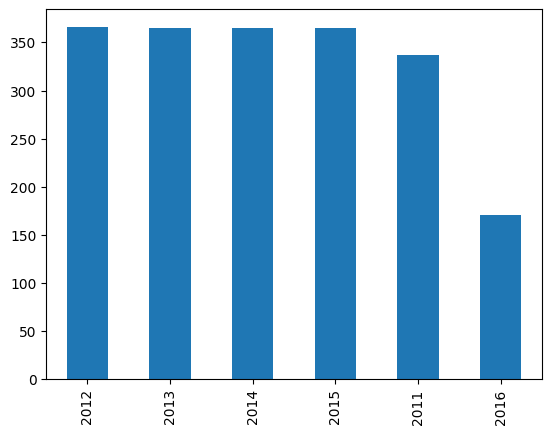

In [ ]:
import matplotlib.pyplot as plt
# calendar_df.plot(x='weekday', y='')
calendar_df['year'].value_counts().plot(kind='bar')

<Axes: >

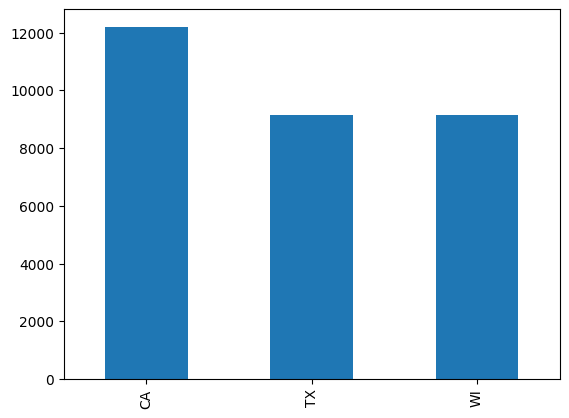

In [ ]:
sales_train_validation_df['state_id'].value_counts().plot(kind='bar')

<Axes: xlabel='item_id', ylabel='sell_price'>

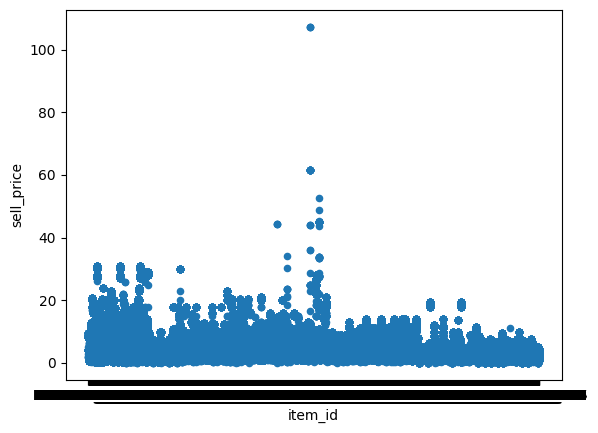

In [ ]:
sell_prices_df.plot.scatter(x='item_id', y='sell_price')

In [ ]:
# import pandas as pd
# calendar_sell_price_df = pd.merge(sell_prices_df, calendar_df, on='wm_yr_wk')
# calendar_sell_price_df

In [ ]:
import pandas as pd

# Reading the data
sales_train_validation_df = pd.read_csv('sales_train_validation.csv')

# Grouping by 'cat_id' and summing all numeric columns
grouped_df = sales_train_validation_df.groupby('cat_id').sum(numeric_only=True)

print(grouped_df)


             d_1    d_2    d_3    d_4    d_5    d_6    d_7    d_8    d_9  \
cat_id                                                                     
FOODS      23178  22758  17174  18878  14603  22093  20490  27751  24862   
HOBBIES     3764   3357   2682   2669   1814   3220   2944   3986   2899   
HOUSEHOLD   5689   5634   3927   3865   2729   3898   4576   6195   4975   

            d_10  ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  \
cat_id            ...                                                           
FOODS      18901  ...   28682   32007   34497   26151   24948   23632   23317   
HOBBIES     2615  ...    3786    4634    4820    3323    3787    3472    3353   
HOUSEHOLD   4056  ...    9321   11721   12323    8585    8835    8239    8363   

           d_1911  d_1912  d_1913  
cat_id                             
FOODS       26704   31927   32654  
HOBBIES      4085    4787    4683  
HOUSEHOLD    9728   12248   12458  

[3 rows x 1913 columns]


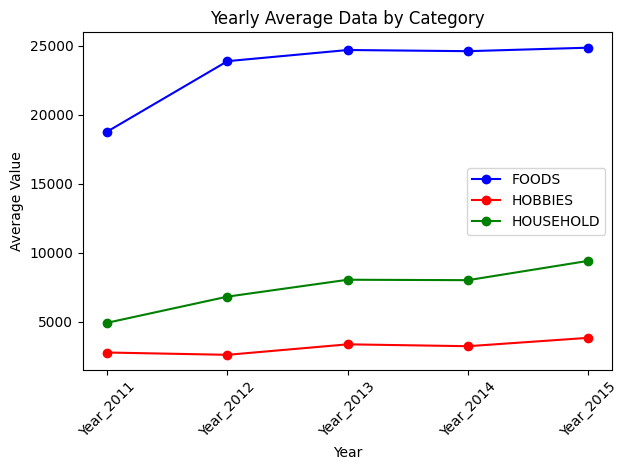

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming a year is 365 days
n_years = int(1913/365)

# Create a new DataFrame to store yearly averages
yearly_avg_df = pd.DataFrame(index=grouped_df.index)

for i in range(n_years):
    start_col = i * 365
    end_col = (i+1) * 365

    yearly_avg_df[f'Year_{2011+i}'] = grouped_df.iloc[:, start_col:end_col].mean(axis=1)

# Plotting the yearly average
years = yearly_avg_df.columns

plt.plot(years, yearly_avg_df.loc['FOODS'], color='blue', marker='o', label='FOODS')
plt.plot(years, yearly_avg_df.loc['HOBBIES'], color='red', marker='o', label='HOBBIES')
plt.plot(years, yearly_avg_df.loc['HOUSEHOLD'], color='green', marker='o', label='HOUSEHOLD')

# Setting up the plot details
plt.title('Yearly Average Data by Category')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
data = grouped_df.to_dict(orient='list')
print(data)

{'d_1': [23178, 3764, 5689], 'd_2': [22758, 3357, 5634], 'd_3': [17174, 2682, 3927], 'd_4': [18878, 2669, 3865], 'd_5': [14603, 1814, 2729], 'd_6': [22093, 3220, 3898], 'd_7': [20490, 2944, 4576], 'd_8': [27751, 3986, 6195], 'd_9': [24862, 2899, 4975], 'd_10': [18901, 2615, 4056], 'd_11': [16963, 2547, 3561], 'd_12': [17655, 2457, 3546], 'd_13': [17340, 2700, 3716], 'd_14': [19038, 2822, 4585], 'd_15': [25187, 3699, 5947], 'd_16': [26656, 3417, 6307], 'd_17': [16015, 2233, 3556], 'd_18': [17425, 2554, 4091], 'd_19': [15351, 2170, 3922], 'd_20': [14290, 2049, 3979], 'd_21': [16594, 2284, 4843], 'd_22': [20938, 4142, 6609], 'd_23': [20028, 2978, 6277], 'd_24': [16373, 2735, 4858], 'd_25': [14043, 2459, 3999], 'd_26': [13932, 2758, 4067], 'd_27': [13733, 2559, 3985], 'd_28': [15480, 2675, 4374], 'd_29': [19905, 4088, 5915], 'd_30': [20660, 2118, 5929], 'd_31': [15066, 1771, 4403], 'd_32': [16568, 1833, 4471], 'd_33': [16218, 1675, 4153], 'd_34': [17242, 1855, 4378], 'd_35': [17512, 1653, 

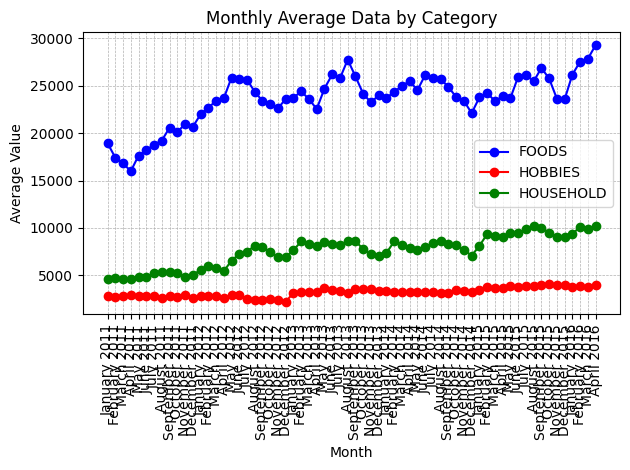

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example grouped_df
data = grouped_df.to_dict(orient='list')
index = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
grouped_df = pd.DataFrame(data, index=index)

# Reshaping the data into a long format
df_long = grouped_df.transpose().reset_index()
df_long.columns = ['day', 'FOODS', 'HOBBIES', 'HOUSEHOLD']
df_long['day_num'] = df_long['day'].str.extract('(\d+)').astype(int)
df_long['month'] = ((df_long['day_num'] - 1) // 30) + 1

# Grouping by category and month, then compute the average
df_monthly = df_long.groupby('month').agg({'FOODS': 'mean', 'HOBBIES': 'mean', 'HOUSEHOLD': 'mean'}).reset_index()

# Plotting
months = np.arange(1, df_monthly['month'].max()+1)
years = np.arange(2011, 2017)
month_labels = [f'{month} {year}' for year in years for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']][:len(months)]

plt.plot(month_labels, df_monthly['FOODS'], color='blue', label='FOODS', marker='o')
plt.plot(month_labels, df_monthly['HOBBIES'], color='red', label='HOBBIES', marker='o')
plt.plot(month_labels, df_monthly['HOUSEHOLD'], color='green', label='HOUSEHOLD', marker='o')

plt.title('Monthly Average Data by Category')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


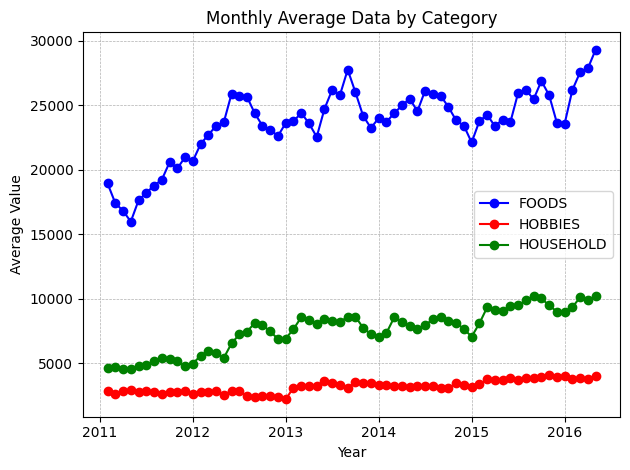

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example grouped_df
data = grouped_df.to_dict(orient='list')
index = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
grouped_df = pd.DataFrame(data, index=index)

# Reshaping the data into a long format
df_long = grouped_df.transpose().reset_index()
df_long.columns = ['day', 'FOODS', 'HOBBIES', 'HOUSEHOLD']
df_long['day_num'] = df_long['day'].str.extract('(\d+)').astype(int)
df_long['month'] = ((df_long['day_num'] - 1) // 30) + 1

# Grouping by category and month, then compute the average
df_monthly = df_long.groupby('month').agg({'FOODS': 'mean', 'HOBBIES': 'mean', 'HOUSEHOLD': 'mean'}).reset_index()

# Plotting
months = np.arange(1, df_monthly['month'].max()+1)
years = np.arange(2011, 2017)

# Instead of using a modulo operation, let's just pick the first month of each year to represent that year
ticks = [i for i, month in enumerate(months) if month == 1 or month % 12 == 1]
tick_labels = [str(year) for year in years]

plt.xticks(ticks, tick_labels)

plt.plot(months, df_monthly['FOODS'], color='blue', label='FOODS', marker='o')
plt.plot(months, df_monthly['HOBBIES'], color='red', label='HOBBIES', marker='o')
plt.plot(months, df_monthly['HOUSEHOLD'], color='green', label='HOUSEHOLD', marker='o')

plt.title('Monthly Average Data by Category')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.tight_layout()
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
melted_df = grouped_df.reset_index().rename(columns={"index": "cat_id"}).melt(id_vars='cat_id', var_name='d', value_name='value')
calendar_df = pd.read_csv ('calendar.csv')
# Merge the melted data with calendar_df
merged_df = pd.merge(calendar_df, melted_df, left_on=calendar_df.index.map(lambda x: f'd_{x+1}'), right_on='d')

# Drop the 'd' column as it's redundant
merged_df = merged_df.drop(columns=['d'])

print(merged_df)

            date  wm_yr_wk   weekday  wday  month  year event_name_1  \
0     2011-01-29     11101  Saturday     1      1  2011          NaN   
1     2011-01-29     11101  Saturday     1      1  2011          NaN   
2     2011-01-29     11101  Saturday     1      1  2011          NaN   
3     2011-01-30     11101    Sunday     2      1  2011          NaN   
4     2011-01-30     11101    Sunday     2      1  2011          NaN   
...          ...       ...       ...   ...    ...   ...          ...   
5734  2016-04-23     11613  Saturday     1      4  2016          NaN   
5735  2016-04-23     11613  Saturday     1      4  2016          NaN   
5736  2016-04-24     11613    Sunday     2      4  2016          NaN   
5737  2016-04-24     11613    Sunday     2      4  2016          NaN   
5738  2016-04-24     11613    Sunday     2      4  2016          NaN   

     event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
0             NaN          NaN          NaN        0        0